In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from ydata_profiling import ProfileReport

In [2]:
# Set print options
np.set_printoptions(suppress=True, precision=4, edgeitems = 7)
pd.options.display.float_format = '{:.4f}'.format
pd.set_option('display.max_columns', None)

In [3]:
# Read data
df = pd.read_csv("./InputData/full_data.csv")

In [4]:
# Enforce variable types
df["market_id"] = df["market_id"].astype(str)
df["store_id"] = df["store_id"].astype(str)
df["order_protocol"] = df["order_protocol"].astype(str)

In [5]:
# Drop non-feature variables
df = df.drop(['created_at', 'actual_delivery_time'], axis = 1)

# Automated

In [7]:
# Generate EDA report
df_report = df.drop([
    'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
    'weekday_6', 'hour_sin', 'hour_cos', 'minute_sin', 'minute_cos',
    'superbowl', 'valentines'], axis = 1)

profile = ProfileReport(
    df_report,
    type_schema = {
        "market_id": "categorical",
        "store_id": "categorical",
        "store_primary_category": "categorical",
        "order_protocol": "categorical",
        
    }, 
    vars = {
        "num": {"low_categorical_threshold": 0},
        "cat": {"length": False}
    },
    missing_diagrams = None,
    correlations={
        "auto": {"threshold": 0.6}
    },
    interactions = {"targets": ["duration"]}
 )

In [8]:
profile.to_file("EDAReport.html")

Export report to file: 100%|████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 333.44it/s]


# Manual

In [7]:
# Find least frequent store_id levels
id_counts = df.store_id.value_counts()

In [8]:
id_counts[id_counts < 50]

store_id
4572    49
1264    49
6144    49
6212    49
515     49
        ..
6256     1
4774     1
4375     1
1482     1
6901     1
Name: count, Length: 4808, dtype: int64

In [14]:
# Find least frequent store_primary_category levels
cat_counts = df.store_primary_category.value_counts()

In [18]:
cat_counts[cat_counts < 50]

store_primary_category
kosher               40
irish                35
soup                 35
southern             26
singaporean          23
comfort-food         18
moroccan             17
european             17
spanish              16
cheese               15
gluten-free          12
african               8
russian               7
lebanese              4
belgian               2
alcohol-plus-food     1
chocolate             1
Name: count, dtype: int64

In [17]:
# Can we combine any store_primary_category levels?
df.store_primary_category.unique()

array(['dessert', 'cafe', 'smoothie', 'mexican', 'american', 'sandwich',
       'breakfast', 'salad', 'sushi', 'fast', 'german', 'seafood',
       'burger', 'catering', 'other', 'mediterranean', 'french',
       'italian', 'pizza', 'thai', 'hawaiian', 'chinese', 'alcohol',
       'dim-sum', 'latin-american', 'soup', 'indian', 'japanese',
       'barbecue', 'vietnamese', 'caribbean', 'nepalese', 'greek',
       'korean', 'middle-eastern', 'vegetarian', 'asian', 'cajun',
       'turkish', 'filipino', 'british', 'tapas', 'persian', 'pasta',
       'burmese', 'bubble-tea', 'peruvian', 'vegan', 'convenience-store',
       'malaysian', 'steak', 'pakistani', 'gluten-free', 'comfort-food',
       'kosher', 'ethiopian', 'brazilian', 'alcohol-plus-food',
       'gastropub', 'singaporean', 'afghan', 'argentine', 'russian',
       'irish', 'southern', 'chocolate', 'moroccan', 'lebanese',
       'spanish', 'cheese', 'european', 'belgian', 'african'],
      dtype=object)

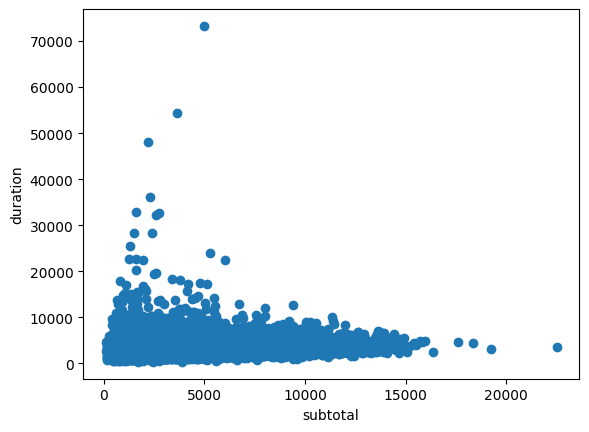

In [20]:
# Scatterplot: subtotal
_ = plt.scatter(df.subtotal, df.duration)
_ = plt.xlabel("subtotal")
_ = plt.ylabel("duration")

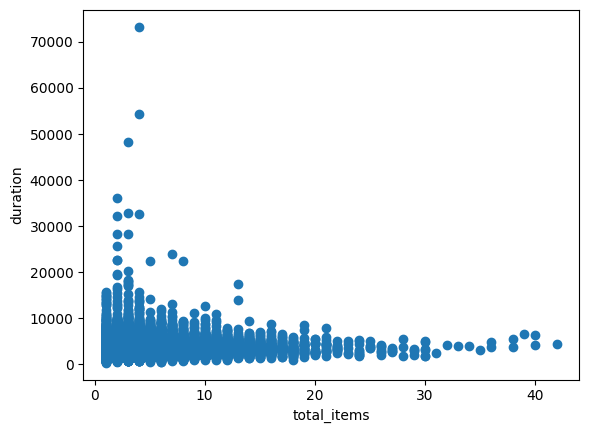

In [22]:
# Scatterplot: total_items
_ = plt.scatter(df.total_items, df.duration)
_ = plt.xlabel("total_items")
_ = plt.ylabel("duration")

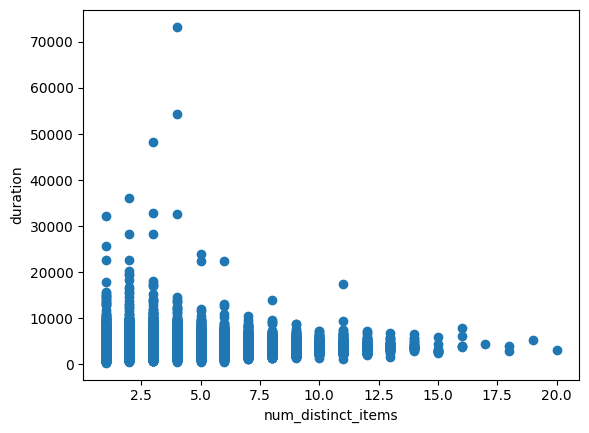

In [23]:
# Scatterplot: num_distinct_items
_ = plt.scatter(df.num_distinct_items, df.duration)
_ = plt.xlabel("num_distinct_items")
_ = plt.ylabel("duration")

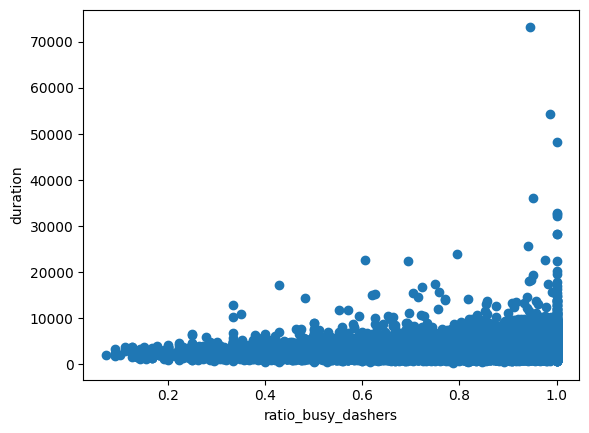

In [21]:
# Scatterplot: ratio_busy_dashers
_ = plt.scatter(df.ratio_busy_dashers, df.duration)
_ = plt.xlabel("ratio_busy_dashers")
_ = plt.ylabel("duration")

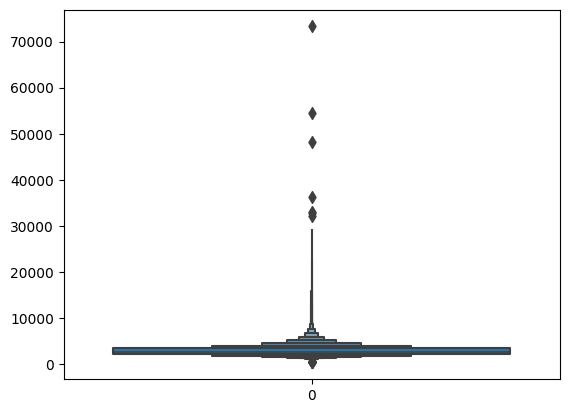

In [10]:
# Extreme values in target
_ = sns.boxenplot(df.duration)

# Findings
- market_id: Target encode.
- store_id:
    - 4800 out of 5700+ levels are smaller than 50.
    - Target encode with regularization. Hierarchy under market_id.
    - Mixed effect
- store_primary_category:
    - 17 out of 73 levels are smaller than 50.
    - Target encode with regularization.
    - Mixed effect.
- order_protocol:
    - level 7 only has 5 obs
    - Target encode with regularization. 